In [ ]:
!pip install streamlit
!pip install gradio
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import os
import pandas as pd
import gradio as gr
import io
import seaborn as sns
import squarify
import plotly.express as px
import ast
import re
from scipy.stats import ttest_ind


In [ ]:
# Chemin du fichier
drive.mount("/content/drive", force_remount=True)
dossier_fichier = "/content/drive/MyDrive/PIP2025/Donnees/LucasFeatAlain.csv"
data = pd.read_csv(dossier_fichier)

Mounted at /content/drive


In [ ]:
colonne = ["Title", "Categories", "Date", "Cast", "Crew", "Budget", "Bechdel", "réalisateur(s)", "année de production", "groupe de nationalité2", "année de dernière diffusion", "nb. de diffusions", "dont en première partie de soirée", "nb. moyen de diffusions par an"]

In [ ]:
# je garde les colonnes qui m'intéressent
data = data[colonne]

In [ ]:
Crew = []

for crew in data["Crew"]:
    crew = ast.literal_eval(crew)
    Crew.append(crew)

Cast = []

for cast in data["Cast"]:
    cast = ast.literal_eval(cast)
    Cast.append(cast)

In [ ]:
# Je regarde si le réalisateur du film est une femme ou pas
est_femme_realisateur = []

for crew in Crew:
    for i in range(len(crew)):
        if crew[i]['job'] == 'Director':
            if crew[i]['gender'] == 1:
                est_femme_realisateur.append(True)
            else:
                est_femme_realisateur.append(False)
            break

print(est_femme_realisateur)
print(len(est_femme_realisateur))


[False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, Fal

In [ ]:
# Je calcule le pourcentage des femmes actrices pour chaque films
# je regarde si l'acteur principal est une femme
# j'evalue l'importance de la femme parmi les acteurs (le premier rôle donné à une femme)
pourcentage_femme_actrice = []
est_femme_Role_1 = []
importance_femme = []
importance_femme1 = []

for cast in Cast:
    cast_genres = [x['gender'] for x in cast]
    # calcule du %

    pourcentage_femme_actrice.append(sum(i for i in cast_genres if i == 1)/len(cast))

    # si l'acteur principal est une femme
    if cast_genres[0] == 1:
        est_femme_Role_1.append(True)
    else:
        est_femme_Role_1.append(False)

    # calcule importance femme
    if 1 in cast_genres:
        importance_femme.append(1 - (cast_genres.index(1) / len(cast)))
        if cast_genres.index(1) in range(5):
            importance_femme1.append("in_First_5_actress")
        else:
            importance_femme1.append("not_in_First_5_actress")
    else:
        importance_femme.append(0)
        importance_femme1.append("not_Women_in_actress")



print(pourcentage_femme_actrice)
print(len(pourcentage_femme_actrice))
print(est_femme_Role_1)
print(len(est_femme_Role_1))
print(importance_femme)
print(len(importance_femme))
print(importance_femme1)
print(len(importance_femme1))

[0.05555555555555555, 0.13333333333333333, 0.0, 0.2112676056338028, 0.0, 0.2727272727272727, 0.037037037037037035, 0.13333333333333333, 0.2, 0.2727272727272727, 0.16071428571428573, 0.0, 0.17857142857142858, 0.2222222222222222, 0.1, 0.3076923076923077, 0.08333333333333333, 0.2222222222222222, 0.5, 0.37037037037037035, 0.2857142857142857, 0.23809523809523808, 0.12, 0.5217391304347826, 0.21052631578947367, 0.19047619047619047, 0.125, 0.13793103448275862, 0.12, 0.21875, 0.22413793103448276, 0.22857142857142856, 0.06060606060606061, 0.13333333333333333, 0.13333333333333333, 0.5, 0.16981132075471697, 0.0, 0.061224489795918366, 0.13333333333333333, 0.061224489795918366, 0.22857142857142856, 0.23809523809523808, 0.15384615384615385, 0.2, 0.09090909090909091, 0.11764705882352941, 0.25, 0.3541666666666667, 0.19047619047619047, 0.2222222222222222, 0.35714285714285715, 0.2631578947368421, 0.1935483870967742, 0.2857142857142857, 0.2222222222222222, 0.13636363636363635, 0.22413793103448276, 0.16129

In [ ]:
# je crée une colonne est_femme_realisateur valant True si le réalisateur est une femme False si non
data["est_femme_realisateur"] = est_femme_realisateur

# je crée une colonne pourcentage_femme_actrice valant le pourcentage des femmes parmi les acteurs du film
data["pourcentage_femme_actrice"] = pourcentage_femme_actrice

# je crée une colonne est_femme_Role_1 valant True si l'acteur principal est une femme et False si non
data["est_femme_Role_1"] = est_femme_Role_1

# je crée une colonne importance_femme valant la valeur de l'importance de la femme parmi les acteurs du film (l'ordre du premier rôle d'une femme)
data["importance_femme"] = importance_femme
data["importance_femme1"] = importance_femme1

<ipython-input-17-9369e2c418ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["est_femme_realisateur"] = est_femme_realisateur
<ipython-input-17-9369e2c418ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pourcentage_femme_actrice"] = pourcentage_femme_actrice
<ipython-input-17-9369e2c418ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
data["année de production"] = data["année de production"].apply(lambda x: int(x) if pd.notnull(x) else x)
data["année de dernière diffusion"] = data["année de dernière diffusion"].apply(lambda x: int(x) if pd.notnull(x) else x)
data["dont en première partie de soirée"] = data["dont en première partie de soirée"].apply(lambda x: int(x) if pd.notnull(x) else x)
data["nb. de diffusions"] = data["nb. de diffusions"].apply(lambda x: int(x) if pd.notnull(x) else x)


<ipython-input-18-7bfe93d7f031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["année de production"] = data["année de production"].apply(lambda x: int(x) if pd.notnull(x) else x)
<ipython-input-18-7bfe93d7f031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["année de dernière diffusion"] = data["année de dernière diffusion"].apply(lambda x: int(x) if pd.notnull(x) else x)
<ipython-input-18-7bfe93d7f031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

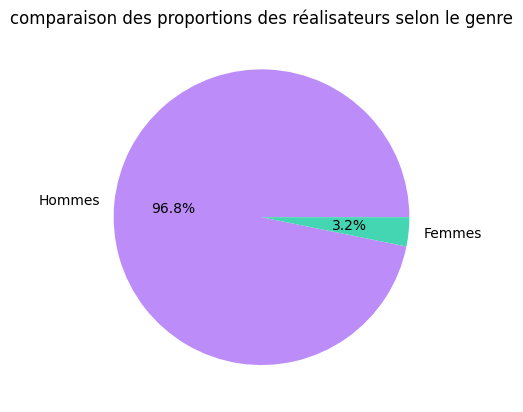

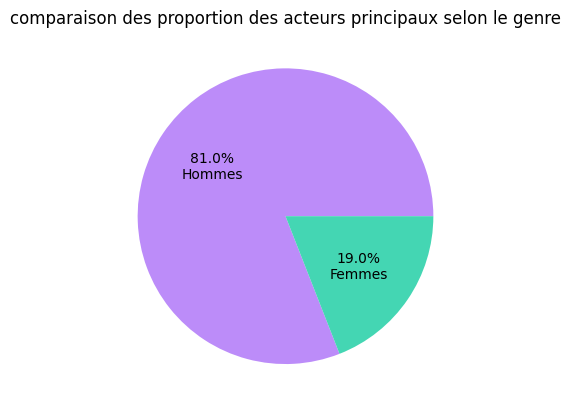

'"\n# Importance des femmes dans les films\nplt.figure(figsize=(12, 6))\nsns.histplot(data=data, x="importance_femme", bins=10, kde=True, color="purple")\nplt.title("Distribution de l\'importance des femmes dans les films")\nplt.xlabel("Importance des femmes")\nplt.ylabel("Fréquence")\nplt.show()\n\nplt.figure(figsize=(12, 6))\nsns.histplot(data=data, x="importance_femme1", bins=10, kde=True, color="purple")\nplt.title("Distribution de l\'importance des femmes dans les films")\nplt.xlabel("Importance des femmes")\nplt.ylabel("Fréquence")\nplt.show()\n\n'

In [ ]:

# Proportion de films réalisés par des femmes
labels=["Femmes", "Hommes"]
femmes_real = data["est_femme_realisateur"].value_counts(normalize=True) * 100
femmes_real.plot.pie(autopct="%.1f%%", labels=["Hommes", "Femmes"],
                     colors=["#BC8CF9", "#44D6B3"], title="comparaison des proportions des réalisateurs selon le genre")
plt.ylabel("")
plt.show()

femme_act = data["est_femme_Role_1"].value_counts(normalize=True) * 100
femme_act.plot.pie(autopct=lambda p: f"{p:.1f}%\n{labels[int(p > 50)]}", labels=None,
                   colors=["#BC8CF9", "#44D6B3"], title="comparaison des proportion des acteurs principaux selon le genre")
plt.ylabel("")
plt.show()

""""
# Importance des femmes dans les films
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="importance_femme", bins=10, kde=True, color="purple")
plt.title("Distribution de l'importance des femmes dans les films")
plt.xlabel("Importance des femmes")
plt.ylabel("Fréquence")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="importance_femme1", bins=10, kde=True, color="purple")
plt.title("Distribution de l'importance des femmes dans les films")
plt.xlabel("Importance des femmes")
plt.ylabel("Fréquence")
plt.show()

"""

Ce graphique circulaire illustre la proportion de femmes réalisatrices parmi les films de notre jeu de données. Il met en évidence qu'elles ne représentent que 3,2 % du total, contre 96,8 % pour les hommes.

En ce qui concerne les acteurs principaux, la proportion d'actrices principales est meilleure que celle des réalisatrices, mais reste encore assez faible : seulement 19 % des rôles principaux sont tenus par des femmes, contre 81 % par des hommes.

In [ ]:
# Budget vs représentation féminine

# Séparation des budgets
"""
budgets_hommes = data[data["est_femme_realisateur"] == 0]["Budget"]
budgets_femmes = data[data["est_femme_realisateur"] == 1]["Budget"]

# Calcul des moyennes
moyenne_hommes = budgets_hommes.mean()
moyenne_femmes = budgets_femmes.mean()

# Test t de Student
t_stat, p_value = ttest_ind(budgets_hommes, budgets_femmes, equal_var=False, nan_policy='omit')


# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
sns.boxplot(data=data, x="est_femme_realisateur", y="Budget", ax=ax, palette="Set2")
ax.set_xticklabels(["Hommes", "Femmes"])
ax.set_title("Comparaison des budgets selon le genre du réalisateur")
ax.set_xlabel("Genre du réalisateur")
ax.set_ylabel("Budget (millions de dollars)")

# Fenêtre à côté du graphique
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text_str = (f"Moyenne (Hommes) : {moyenne_hommes:.2f}\n"
            f"Moyenne (Femmes) : {moyenne_femmes:.2f}\n"
            f"p-value : {p_value:.4f}")
ax.text(1.05, 0.5, text_str, transform=ax.transAxes, fontsize=12,
        verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

"""


'\nbudgets_hommes = data[data["est_femme_realisateur"] == 0]["Budget"]\nbudgets_femmes = data[data["est_femme_realisateur"] == 1]["Budget"]\n\n# Calcul des moyennes\nmoyenne_hommes = budgets_hommes.mean()\nmoyenne_femmes = budgets_femmes.mean()\n\n# Test t de Student\nt_stat, p_value = ttest_ind(budgets_hommes, budgets_femmes, equal_var=False, nan_policy=\'omit\')\n\n\n# Création de la figure\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Boxplot\nsns.boxplot(data=data, x="est_femme_realisateur", y="Budget", ax=ax, palette="Set2")\nax.set_xticklabels(["Hommes", "Femmes"])\nax.set_title("Comparaison des budgets selon le genre du réalisateur")\nax.set_xlabel("Genre du réalisateur")\nax.set_ylabel("Budget (millions de dollars)")\n\n# Fenêtre à côté du graphique\nprops = dict(boxstyle=\'round\', facecolor=\'wheat\', alpha=0.5)\ntext_str = (f"Moyenne (Hommes) : {moyenne_hommes:.2f}\n"\n            f"Moyenne (Femmes) : {moyenne_femmes:.2f}\n"\n            f"p-value : {p_value:.4f}")\nax.text(

<ipython-input-34-89de7fb9bbc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="est_femme_realisateur", y="pourcentage_femme_actrice", palette="Set2")


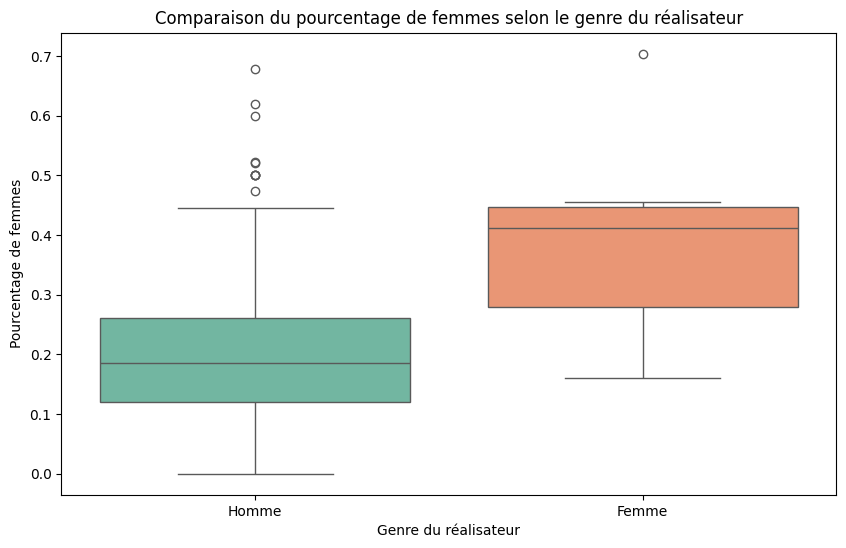

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="est_femme_realisateur", y="pourcentage_femme_actrice", palette="Set2")
plt.title("Comparaison du pourcentage de femmes selon le genre du réalisateur")
plt.xticks([0, 1], ["Homme", "Femme"])
plt.xlabel("Genre du réalisateur")
plt.ylabel("Pourcentage de femmes")
plt.show()

<ipython-input-23-6e01644b4bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="est_femme_Role_1", y="nb. de diffusions", palette="Set2")


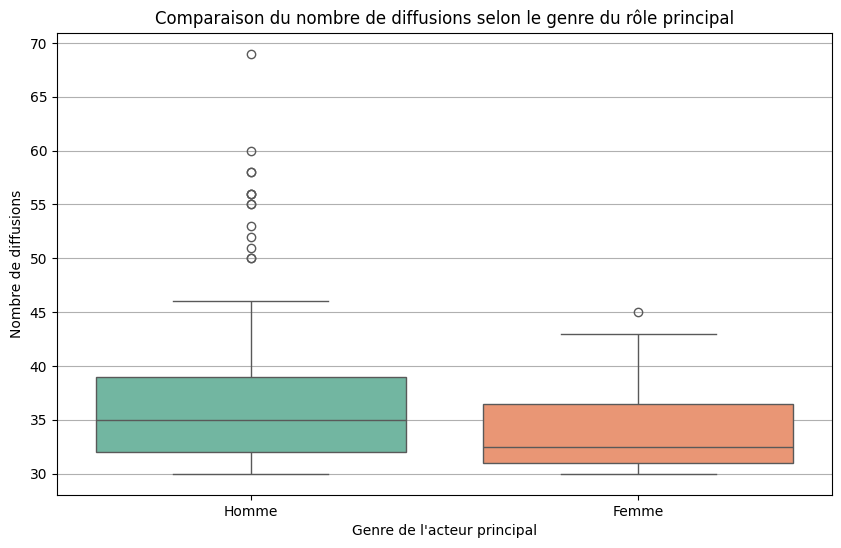

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="est_femme_Role_1", y="nb. de diffusions", palette="Set2")
plt.title("Comparaison du nombre de diffusions selon le genre du rôle principal")
plt.xticks([0, 1], ["Homme", "Femme"])
plt.xlabel("Genre de l'acteur principal")
plt.ylabel("Nombre de diffusions")
plt.grid(axis="y")
plt.show()


In [ ]:
"""
# chargement des fichiers
fichier_1957 = "classement_films_1957.csv"
fichier_DataSet = "TMDb_Dataset.csv"

Data1957 = pd.read_csv(fichier_1957, encoding='latin1')
DataSet = pd.read_csv(fichier_DataSet, encoding='utf-8')

def clean_title(title):
    if isinstance(title, str):
        return re.sub(r"\s*\(.*?\)$", "", title)
    return title

Data1957["titre"] = Data1957["titre"].apply(clean_title)

#print(DataSet['Crew'][0])

# Transformations des données de la colonnes Crew
Crew = []

for crew in DataSet["Crew"]:
    crew = ast.literal_eval(crew)
    Crew.append(crew)


realisateur = []

for crew in Crew:
    j = 0
    for i in range(len(crew)):
        if crew[i]['job'] == 'Director':
            j+=1
            realisateur.append(crew[i]['original_name'])
            break
    if j == 0:
        realisateur.append("")

print(realisateur)
print(len(realisateur))

DataSet["réalisateur"] = realisateur

def diviser_chaine(chaine):
    # Diviser la chaîne au premier espace
    partie1, _, partie2 = chaine.partition(' ')
    return partie2 + " " + partie1

DataSet["réalisateur"] = DataSet["réalisateur"].apply(diviser_chaine)

# je mets en miniscule tous les titres des films
Data1957["titre"] = Data1957["titre"].str.strip().str.lower()
Data1957["réalisateur(s)"] = Data1957["réalisateur(s)"].str.strip().str.lower()
DataSet["Title"] = DataSet["Title"].str.strip().str.lower()
DataSet["réalisateur"] = DataSet["réalisateur"].str.strip().str.lower()

# je garde les films communs de mes 2 dataframes
data = pd.merge(Data1957, DataSet, left_on=["titre", "réalisateur(s)"], right_on=["Title", "réalisateur"])

colonne = ["titre", "réalisateur(s)", "année de production", "groupe de nationalité2", "année de dernière diffusion", "nb. de diffusions", "dont en première partie de soirée", "nb. moyen de diffusions par an", "Categories", "Date", "Cast", "Crew", "Budget", "Bechdel"]

# je garde les colonnes qui m'intéressent
data = data[colonne]

# Je regarde si le réalisateur du film est une femme ou pas
est_femme_realisateur = []

for crew in Crew:
    for i in range(len(crew)):
        if crew[i]['job'] == 'Director':
            if crew[i]['gender'] == 1:
                est_femme_realisateur.append(True)
            else:
                est_femme_realisateur.append(False)
            break

print(est_femme_realisateur)
print(len(est_femme_realisateur))

# je crée une colonne est_femme_realisateur valant True si le réalisateur est une femme False si non
data["est_femme_realisateur"] = est_femme_realisateur

# Transformations des données de la colonnes Cast
Cast = []

for cast in data["Cast"]:
    cast = ast.literal_eval(cast)
    Cast.append(cast)


# Je calcule le pourcentage des femmes actrices pour chaque films
# je regarde si l'acteur principal est une femme
# j'evalue l'importance de la femme parmi les acteurs (le premier rôle donné à une femme)
pourcentage_femme_actrice = []
est_femme_Role_1 = []
importance_femme = []

for cast in Cast:
    nb_femme = 0
    # si l'acteur principal est une femme
    if cast[0]["gender"] == 1:
        est_femme_Role_1.append(True)
        nb_femme += 1
    else:
        est_femme_Role_1.append(False)
    # calcule du %
    for i in range(1 ,len(cast)):
        if cast[i]['gender'] == 1:
            nb_femme += 1
    pourcentage_femme_actrice.append(nb_femme/len(cast))

for cast in Cast:
    cast_genres = [x['gender'] for x in cast]
    # calcule du %

    pourcentage_femme_actrice.append(sum(i for i in cast_genres if i == 1)/len(cast))

    # si l'acteur principal est une femme
    if cast_genres[0] == 1:
        est_femme_Role_1.append(True)
    else:
        est_femme_Role_1.append(False)

    # calcule importance femme
    if 1 in cast_genres:
        importance_femme.append(1 - (cast_genres.index(1) / len(cast)))
    else:
        importance_femme.append(0)



print(pourcentage_femme_actrice)
print(len(pourcentage_femme_actrice))
print(est_femme_Role_1)
print(len(est_femme_Role_1))
print(importance_femme)
print(len(importance_femme))


# je crée une colonne pourcentage_femme_actrice valant le pourcentage des femmes parmi les acteurs du film
data["pourcentage_femme_actrice"] = pourcentage_femme_actrice

# je crée une colonne est_femme_Role_1 valant True si l'acteur principal est une femme et False si non
data["est_femme_Role_1"] = est_femme_Role_1

# je crée une colonne importance_femme valant la valeur de l'importance de la femme parmi les acteurs du film (l'ordre du premier rôle d'une femme)
data["importance_femme"] = importance_femme

# Exporter en fichier CSV
data.to_csv(
    "Films_les_plus_diffuses_a_la_television_1957_modifie.csv",
    index=False,          # Pas d'index dans le fichier
    encoding="utf-8",     # Encodage UTF-8
    header=True           # Inclure les noms des colonnes
)
"""
